## Import Relevant Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV , KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## Load the Data

In [4]:
data = pd.read_csv("real_estate_dataset.csv")
data.head()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


## Check for Nulls

In [5]:
data.isna().sum().sort_values()

ID                    0
Square_Feet           0
Num_Bedrooms          0
Num_Bathrooms         0
Num_Floors            0
Year_Built            0
Has_Garden            0
Has_Pool              0
Garage_Size           0
Location_Score        0
Distance_to_Center    0
Price                 0
dtype: int64

## Define features and target

In [6]:
x = data.drop(['ID','Price'] , axis = 1)
y = data.Price

## Data Splitting

In [7]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state = 365 , test_size = 0.2)

## Data Scaling

In [8]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Model Selection

In [9]:
models = {'lasso':Lasso() , 'Linear':LinearRegression() , 'ridge':Ridge()}
result = []

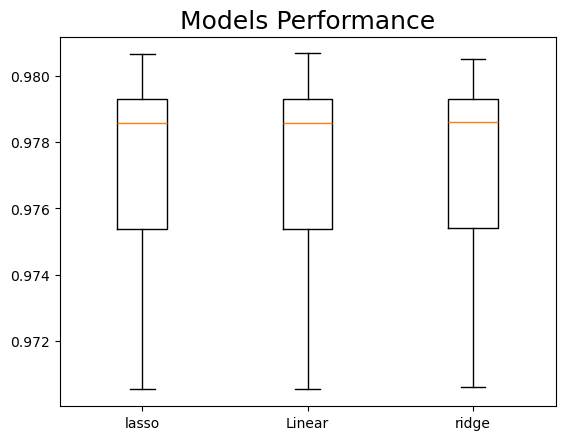

In [10]:
for model in models.values():
    kf = KFold(n_splits=5 , shuffle=True , random_state=365)
    score = cross_val_score(model , x_train_scaled , y_train , cv=kf)
    result.append(score)
plt.boxplot(result , labels=models.keys())
plt.title('Models Performance' , size = 18)
plt.show()

## Creating Pipline

In [11]:
steps = [('scaler',StandardScaler()) , ('lasso',Lasso())]
params = {'lasso__alpha':np.linspace(0.0001,1,100)}
pipeline = Pipeline(steps)
kf = KFold(n_splits=5 , shuffle=True , random_state=365)
cv = GridSearchCV(pipeline , param_grid=params , cv=kf )
cv.fit(x_train , y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=365, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([1.000e-04, 1.020e-02, 2.030e-02, 3.040e-02, 4.050e-02, 5.060e-02,
       6.070e-02, 7.080e-02, 8.090e-02, 9.100e-02, 1.011e-01, 1.112e-01,
       1.213e-01, 1.314e-01, 1.415e-01, 1.516e-01, 1.617e-01, 1.718e-0...
       6.061e-01, 6.162e-01, 6.263e-01, 6.364e-01, 6.465e-01, 6.566e-01,
       6.667e-01, 6.768e-01, 6.869e-01, 6.970e-01, 7.071e-01, 7.172e-01,
       7.273e-01, 7.374e-01, 7.475e-01, 7.576e-01, 7.677e-01, 7.778e-01,
       7.879e-01, 7.980e-01, 8.081e-01, 8.182e-01, 8.283e-01, 8.384e-01,
       8.485e-01, 8.586e-01, 8.687e-01, 8.788e-01, 8.889e-01, 8.990e-01,
       9.091e-01, 9.192e-01, 9.293e-01, 9.394e-01, 9.495e-01, 9.596e-01,
       9.697e-01, 9.798e-01, 9.899e-01, 1.000e+00])})

## Pipeline Examining

In [12]:
print(f"The best Accuracy is : {cv.best_score_}\nThe best Parameters is: {cv.best_params_}")

The best Accuracy is : 0.9768948816968089
The best Parameters is: {'lasso__alpha': 0.2526}


## Check Model Performance on test data

In [13]:
print(f"The Accuracy on test data is : {cv.score(x_test,y_test)}")

The Accuracy on test data is : 0.9632541744707553
